# 第2章 NumPy 向量計算
在這一章中你會學到 :

* NumPy簡介
* NumPy數組的---構建、方法、屬性
* 基於數組的基礎數學知識
* 數組的操控方式
* 通過NumPy來執行模擬操作

## 2.1 NumPy簡介

* Python的 **向量化** 解決方案
* NumPy提供較高級的函數
* 可執行複雜運算(傅立葉轉換等)

以下我們對**距離**和**時間**相關的數據進行計算當作範例

In [3]:
# Data 設定

distances =[10,15,17,26,20]
times=[0.3,0.47,0.55,1.20,1.0]


In [4]:
# 方法1 : 利用for迴圈

speeds=[]

for i in range(len(distances)):
    speeds.append(distances[i]/times[i])

speeds


[33.333333333333336,
 31.914893617021278,
 30.909090909090907,
 21.666666666666668,
 20.0]

zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。 

a = [1,2,3] 

b = [4,5,6] 

zipped = zip(a,b)   # 打包为元组的列表 
[(1, 4), (2, 5), (3, 6)]

In [5]:
# 方法2 : 利用zip

[d/t for d, t in zip(distances,times)]

[33.333333333333336,
 31.914893617021278,
 30.909090909090907,
 21.666666666666668,
 20.0]

In [6]:
# zip 練習 : 計算總銷售額

product_quantities = [13, 5, 6, 10, 11]
prices = [1.2, 6.5, 1.0, 4.8, 5.0]

total=sum([q*p for q, p in zip(product_quantities,prices)])
total

157.1

但這樣還是有點太慢了，我們能不能直接寫 distances/ times就得到結果呢?

答案是不行! 

Python並不支援list之間的運算，這時候NumPy就派上用場了

## 2.2 NumPy array

* Array 為相同類型的元素組成的表
* 索引從 0 開始

### 2.2.1 在NumPy中創建Array

* 方法1 : 從 list 創建
* 方法1 : 使用 Numpy 提供的內建函數


#### 方法1

In [7]:
import numpy as np

In [8]:
# 方法1
# arrays from lists
distances = [10, 15, 17, 26, 20]
times = [0.3, 0.47, 0.55, 1.20, 1.0]
distances = np.array(distances)
times = np.array(times)


In [9]:
product_quantities = [13, 5, 6, 10, 11]
prices = [1.2, 6.5, 1.0, 4.8, 5.0]
product_quantities = np.array(product_quantities)
prices = np.array(prices)

In [10]:
distances

array([10, 15, 17, 26, 20])

In [11]:
type(distances)

numpy.ndarray

#### 方法2

有時候在還沒確定Arrays的值之前我們要給定初始值，因此我們要透過函數來生成默認值的Arrays


In [14]:
# 生成初始值為 0 長度為 10 的 Arrays

np.zeros(10,dtype=int)  # dtype用來控制 Array中元素的型態這裡為整數

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
# 生成初始值為 1.0 3*5的Array

np.ones(shape=(3,5),dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

#### 創建一個線性序列的 Array(給間距) 


In [18]:
# 創建一個線性序列的 Array 

np.arange(start=0,stop=20,step=2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

#### 創建一個線性序列的 Array(給均勻間隔的數量) 

In [17]:
# 創建一個線性序列的 Array

np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

### 2.2.2 Arrays的屬性

In [19]:
A = np.ones(shape=(3, 4), dtype=float)
A

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#### 維數

In [20]:
A.ndim

2

#### SHAPE

In [21]:
A.shape

(3, 4)

#### 總元素數量

In [22]:
A.size

12

熟悉這些過後我們就可以來解決剛剛速度的問題了

In [23]:
speeds = distances/times
speeds

array([33.33333333, 31.91489362, 30.90909091, 21.66666667, 20.        ])

In [25]:
values= product_quantities* prices
total=values.sum()
print(values)
total

[15.6 32.5  6.  48.  55. ]


157.1

In [26]:
x =np.arange(0,20,2)
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [27]:
x+1

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [28]:
x*2

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36])

In [29]:
x/2

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

除此之外 **NumPy** 還提供了 **Universal functions** 作為數學函數

In [30]:
np.sin(x)

array([ 0.        ,  0.90929743, -0.7568025 , -0.2794155 ,  0.98935825,
       -0.54402111, -0.53657292,  0.99060736, -0.28790332, -0.75098725])

In [31]:
np.exp(x)

array([1.00000000e+00, 7.38905610e+00, 5.45981500e+01, 4.03428793e+02,
       2.98095799e+03, 2.20264658e+04, 1.62754791e+05, 1.20260428e+06,
       8.88611052e+06, 6.56599691e+07])

In [32]:
np.log(x+1)

array([0.        , 1.09861229, 1.60943791, 1.94591015, 2.19722458,
       2.39789527, 2.56494936, 2.7080502 , 2.83321334, 2.94443898])

In [33]:
np.sqrt(x)

array([0.        , 1.41421356, 2.        , 2.44948974, 2.82842712,
       3.16227766, 3.46410162, 3.74165739, 4.        , 4.24264069])

### 2.2.4 Arrays的常見操作

#### 利用索引對元素操作

In [35]:
one_dim = np.linspace(-0.5, 0.6, 12)
one_dim

array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6])

In [36]:
one_dim[5]

0.0

In [37]:
one_dim[0] = 1
one_dim

array([ 1. , -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6])

In [38]:
two_dim = np.array([[3, 5, 2, 4], [7, 6, 5, 5], [1, 6, -1, -1]])
two_dim

array([[ 3,  5,  2,  4],
       [ 7,  6,  5,  5],
       [ 1,  6, -1, -1]])

In [39]:
two_dim[0,3]

4

In [40]:
two_dim[0,0] = -1
two_dim

array([[-1,  5,  2,  4],
       [ 7,  6,  5,  5],
       [ 1,  6, -1, -1]])

#### Arrays 的 Slice

In [41]:
one_dim

array([ 1. , -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6])

In [43]:
print(one_dim[2:5])  # 並不包含5
print(one_dim[:5])
print(one_dim[-5:])  # 從倒數第五個開始

[-0.3 -0.2 -0.1]
[ 1.  -0.4 -0.3 -0.2 -0.1]
[0.2 0.3 0.4 0.5 0.6]


In [44]:
two_dim

array([[-1,  5,  2,  4],
       [ 7,  6,  5,  5],
       [ 1,  6, -1, -1]])

In [45]:
two_dim[:2,:2]

array([[-1,  5],
       [ 7,  6]])

In [46]:
two_dim[:,1:3]

array([[ 5,  2],
       [ 6,  5],
       [ 6, -1]])

#### 重構Arrays  利用reshape

In [47]:
one_dim

array([ 1. , -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
        0.6])

In [48]:
one_dim.reshape(2,6)

array([[ 1. , -0.4, -0.3, -0.2, -0.1,  0. ],
       [ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6]])

#### 轉化為1維數據 flatten()

In [51]:
two_dim

array([[-1,  5,  2,  4],
       [ 7,  6,  5,  5],
       [ 1,  6, -1, -1]])

In [52]:
two_dim.flatten()

array([-1,  5,  2,  4,  7,  6,  5,  5,  1,  6, -1, -1])

## 2.3  利用NumPy進行模擬

### 2.3.1 Coin flips 擲硬幣

#### 利用 NumPy 隨機模塊 randint

In [60]:
# throwing a coin 1 time: 0 is tail, 1 heads
# size= 次數
# high= 上限(但不包含數字本身)
np.random.randint(low=0, high=2, size=1)

array([1])

In [61]:
# throwing a coin 10 times: 0 is tail, 1 heads
experiment = np.random.randint(0,2, size=10)
print(experiment)
print(experiment.sum())

[1 1 1 0 1 1 0 0 1 1]
7


#### 做10000次試驗

In [63]:
#Each column of this matrix will be one 10-tosses simulation
coin_matrix = np.random.randint(0,2,size=(10000,10)) 
coin_matrix[:5,:]

array([[0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1]])

In [69]:
counts = coin_matrix.sum(axis=1)
print(counts[:25])
print(counts.mean())
print(np.median(counts))
print(counts.min(), counts.max())
print(counts.std())

[7 5 5 3 5 3 2 4 5 4 4 4 5 7 3 6 5 6 6 6 2 6 8 3 3]
5.0026
5.0
0 10
1.5830960931036373


####  bincount用法 : bin的數量比x中的最大值大1，每個bin給出了索引值在x中出現的次數

In [70]:
np.bincount(counts)

array([  10,   80,  459, 1177, 2064, 2424, 2060, 1171,  442,  102,   11],
      dtype=int64)

In [75]:
unique_numbers = np.arange(0,11) # The numbers that where observed in the counts vector
observed_times = np.bincount(counts) # Check out the documentation for the np.bincount function
print("===============\n")
for n, count in zip(unique_numbers, observed_times):
    print("{} heads observed {} times ({:.1f}%)".format(n, count, 100*count/10000))


0 heads observed 10 times (0.1%)
1 heads observed 80 times (0.8%)
2 heads observed 459 times (4.6%)
3 heads observed 1177 times (11.8%)
4 heads observed 2064 times (20.6%)
5 heads observed 2424 times (24.2%)
6 heads observed 2060 times (20.6%)
7 heads observed 1171 times (11.7%)
8 heads observed 442 times (4.4%)
9 heads observed 102 times (1.0%)
10 heads observed 11 times (0.1%)


### 2.3.1 Coin flips Simulating Stock Returns


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
returns = np.random.normal(0.0001,0.02,250)

In [78]:
returns[:20]

array([-0.02034311, -0.03422005, -0.02260336,  0.01535292,  0.00599754,
        0.03960908, -0.01196093, -0.01233235, -0.00399699,  0.01100331,
        0.01560169, -0.02334246, -0.02798038, -0.02181586, -0.02458086,
        0.01246511, -0.01758381,  0.02680207, -0.01486737, -0.04411566])

In [79]:
initial_price = 100

#### returns.cumsum() 求類加數

In [82]:
price = initial_price*np.exp(returns.cumsum())

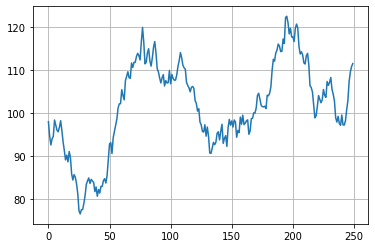

In [83]:
plt.plot(price)
plt.grid();